# 1. 문제정의
## 영화관객 수 예측
감독, 이름, 상영등급, 스태프 수 등의 정보로 영화 관객 수를 예측하는 모델을 만들고자 한다. 
y: next_arrive_time
x: 영화 관객 수에 영향을 주는 요소들 (Data Set에서 columns)

### 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./movies_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [4]:
df.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083


1. title : 영화 제목    
2. distributor: 배급사     
3. genre : 영화 장르         
4. release_time: 개봉일
5. time: 상영시간(분)            
6. screening_rat: 상영등급
7. director: 감독        
8. dir_prev_bfnum : 해당 감독이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수
9. dir_prev_num : 해당 감독이 영화를 만들기 전 제작에 참여한 영화의 개수
10. num_staff: 스태프 수       
11. num_actor: 배우 수    
12. box_off_num: 관객 수 

In [5]:
## 결측치를 찾음
df.isnull().sum()
## dir_prev_bfnum 에 결측치가 있음. 감독이 이전에 제작에 참여한 적이 없는 것 같음

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [6]:
df[df['dir_prev_bfnum'].isnull()]
# dir_prev_num에 0이 대입되어 있으니 dir_prev_bfnum에 0을 집어넣음 

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [7]:
df['dir_prev_bfnum'] = df['dir_prev_bfnum'].fillna(0)

In [8]:
df.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [9]:
###release_time을 year, month로 따로 컬럼을 만들어줌
df['release_time'] = pd.to_datetime(df['release_time'])
df['year'] = df['release_time'].apply(lambda x: x.year)
df['month'] = df['release_time'].apply(lambda x: x.month)

In [10]:
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013,6
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012,7
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010,11


### 종속변수 탐색

In [11]:
pd.options.display.float_format = '{:.5f}'.format
# 지수표현식이 아닌 실수표현으로 보기 위한 설정

In [12]:
# 종속변수의 기초통계량을 살펴봄
df['box_off_num'].describe()

count        600.00000
mean      708181.75167
std      1828005.85114
min            1.00000
25%         1297.25000
50%        12591.00000
75%       479886.75000
max     14262766.00000
Name: box_off_num, dtype: float64

<Axes: >

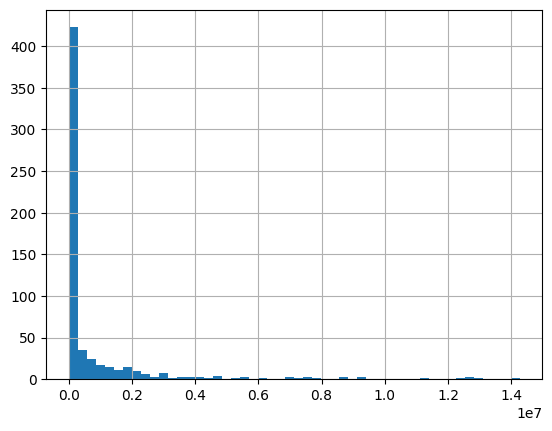

In [13]:
# 시각화
df['box_off_num'].hist(bins=50)

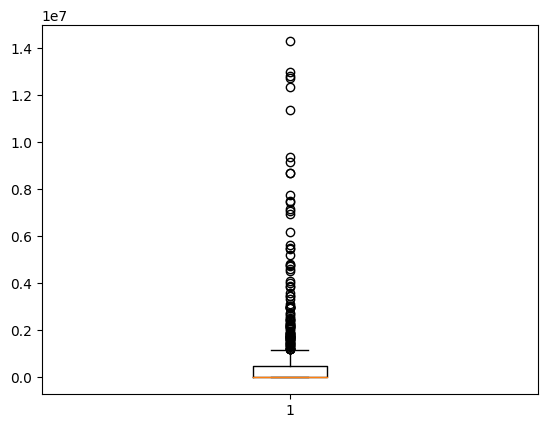

In [14]:
plt.boxplot(df['box_off_num'])
plt.show()
# 1부터 14,000,000 까지 다양한 관객수로 분포되어 있다. 

### 독립변수 살펴보기

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
 12  year            600 non-null    int64         
 13  month           600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(5)
memo

C:\Users\ahneunjeong\AppData\Local\Temp\ipykernel_16440\2492131507.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numerical_columns].hist(ax=ax)


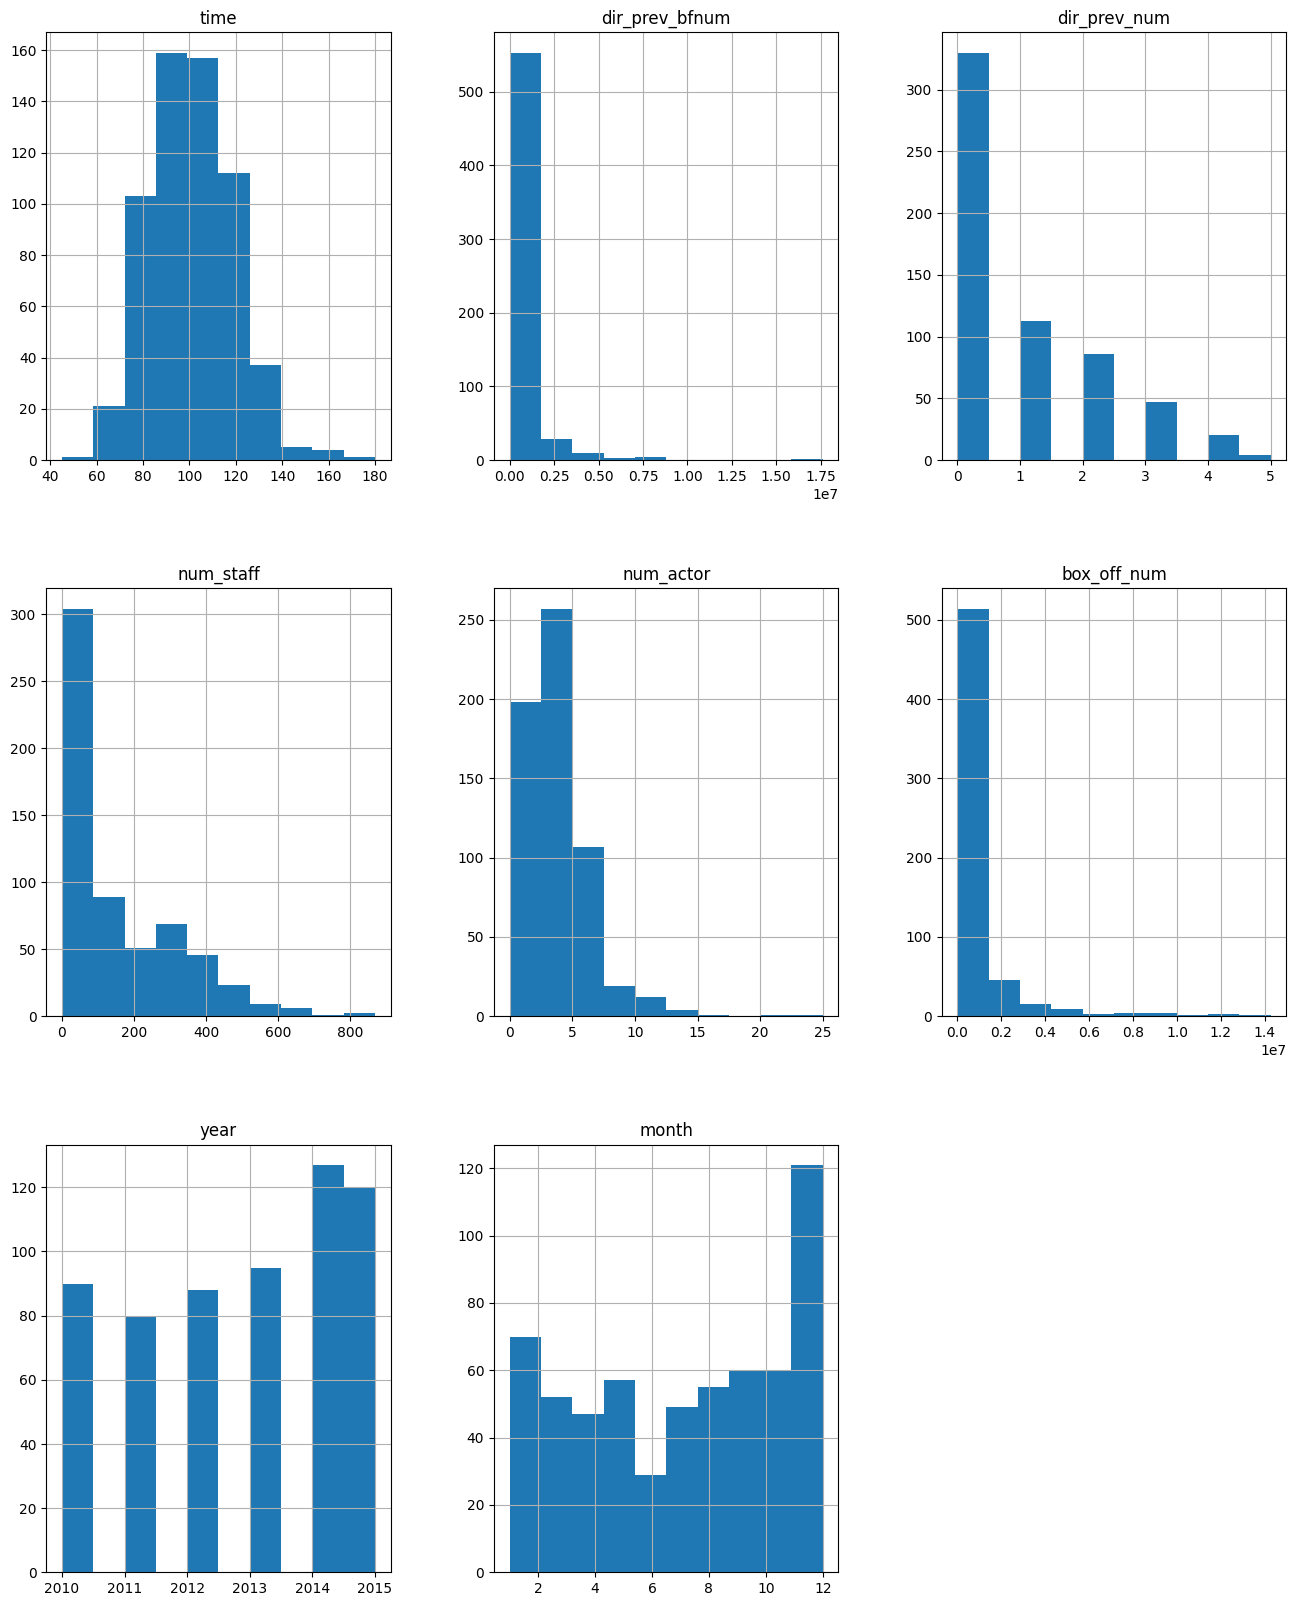

In [16]:
# numerical features
numerical_columns = ['time','dir_prev_bfnum', 'dir_prev_num' ,'num_staff', 'num_actor','box_off_num','year','month']

fig = plt.figure(figsize=(16,20))
ax = fig.gca()

df[numerical_columns].hist(ax=ax)
plt.show()

### 독립변수와 종속변수 간의 관계 탐색

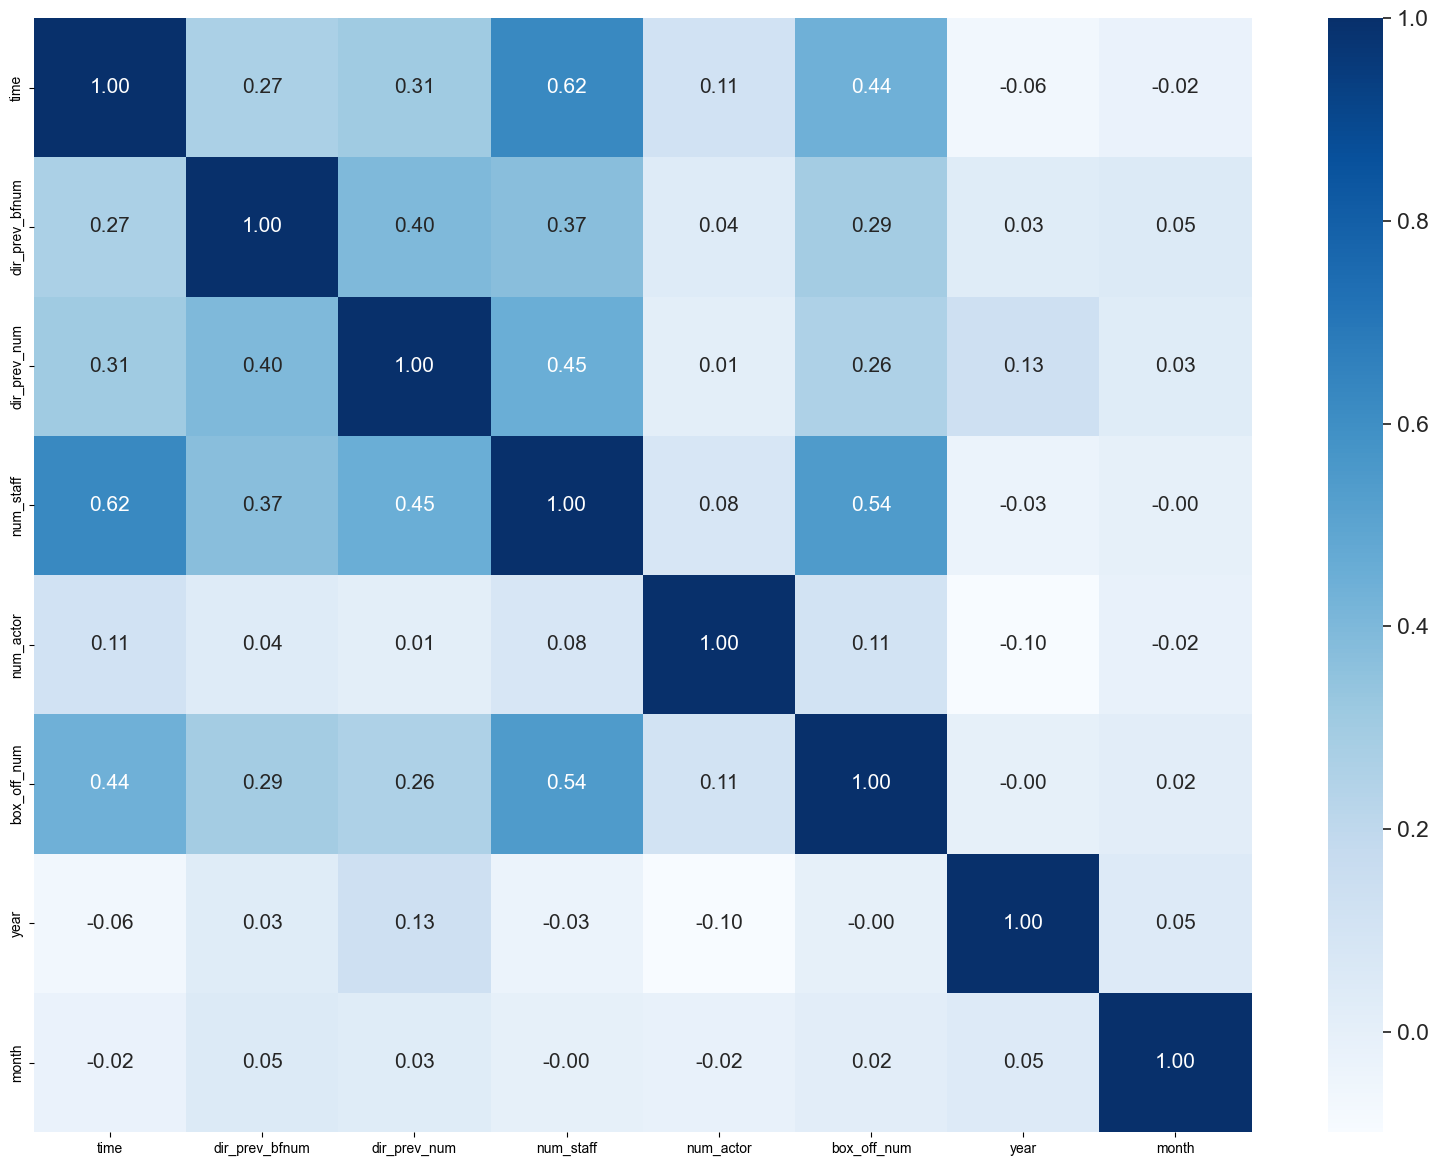

In [17]:
cols = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff','num_actor','box_off_num','year','month']

corr = df[cols].corr(method='pearson')
fig = plt.figure(figsize=(16,12))
ax = fig.gca()

sns.set(font_scale = 1.5)
heatmap = sns.heatmap(corr.values, annot=True, fmt = '.2f', annot_kws = {'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap='Blues')
plt.tight_layout()
plt.show()

In [18]:
## 종속변수와의 상관관계를 살펴보면
#  0.5를 넘는 것이 num_staff밖에 없어 양의 상관관계는 파악할 수 없다. 
# year가 -0.0인 것으로 보아 관객수에는 완전한 음의 상관관계이다. 

### 독립변수와 종속변수 간의 관계 탐색

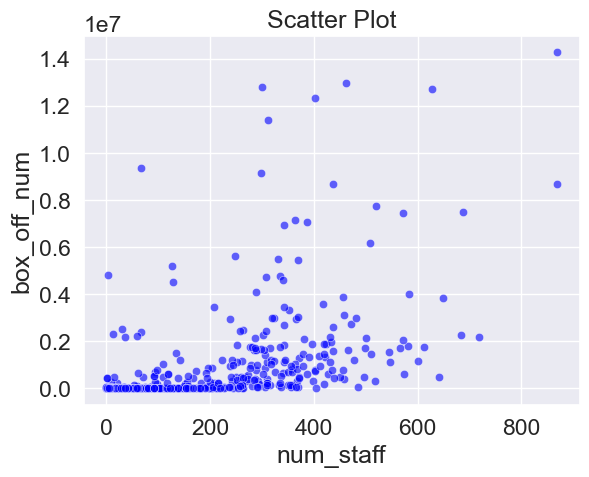

In [19]:
sns.scatterplot(data=df, x='num_staff', y='box_off_num',markers='o', color='blue',alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [20]:
## 영화 관객의 수와 num_staff는 상관관계를 갖고 있지 않다. 
# 즉 스태프의 숫자는 영화 관객의 수에 영향을 주지 않는다. 

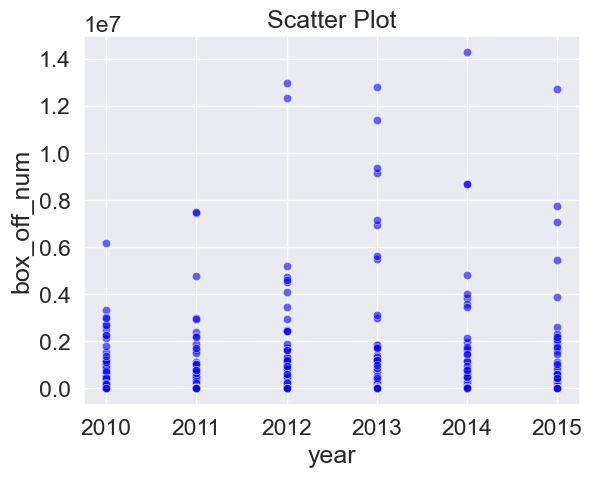

In [21]:
sns.scatterplot(data=df, x='year', y='box_off_num',markers='o', color='blue',alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [22]:
## year는 관객수에 영향을 미치지 않는다. 

### 장르별 차이 탐색
영화 관객 수에는 장르가 관련이 있다고 생각하기에 장르별 차이를 탐색한다. 
1. title : 영화 제목    
2. distributor: 배급사     
3. genre : 영화 장르         
4. release_time: 개봉일
5. time: 상영시간(분)            
6. screening_rat: 상영등급
7. director: 감독        
8. dir_prev_bfnum : 해당 감독이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수
9. dir_prev_num : 해당 감독이 영화를 만들기 전 제작에 참여한 영화의 개수
10. num_staff: 스태프 수       
11. num_actor: 배우 수    
12. box_off_num: 관객 수 

In [23]:
df[['genre','box_off_num']].groupby('genre').mean().sort_values(by='box_off_num')
# 느와르의 관객수가 가장 많다. 

,box_off_num
genre,
뮤지컬,6627.00000
다큐멘터리,67172.25806
서스펜스,82611.00000
애니메이션,181926.66667
멜로/로맨스,425968.03846
미스터리,527548.17647
공포,590832.52381
드라마,625689.79186
코미디,1193914.00000


In [24]:
# 그래프를 그리기 전 한글폰트 설정을 해준다. 
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\ahneunjeong\AppData\Local\Temp\ipykernel_16440\714562975.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


<Axes: xlabel='box_off_num', ylabel='genre'>

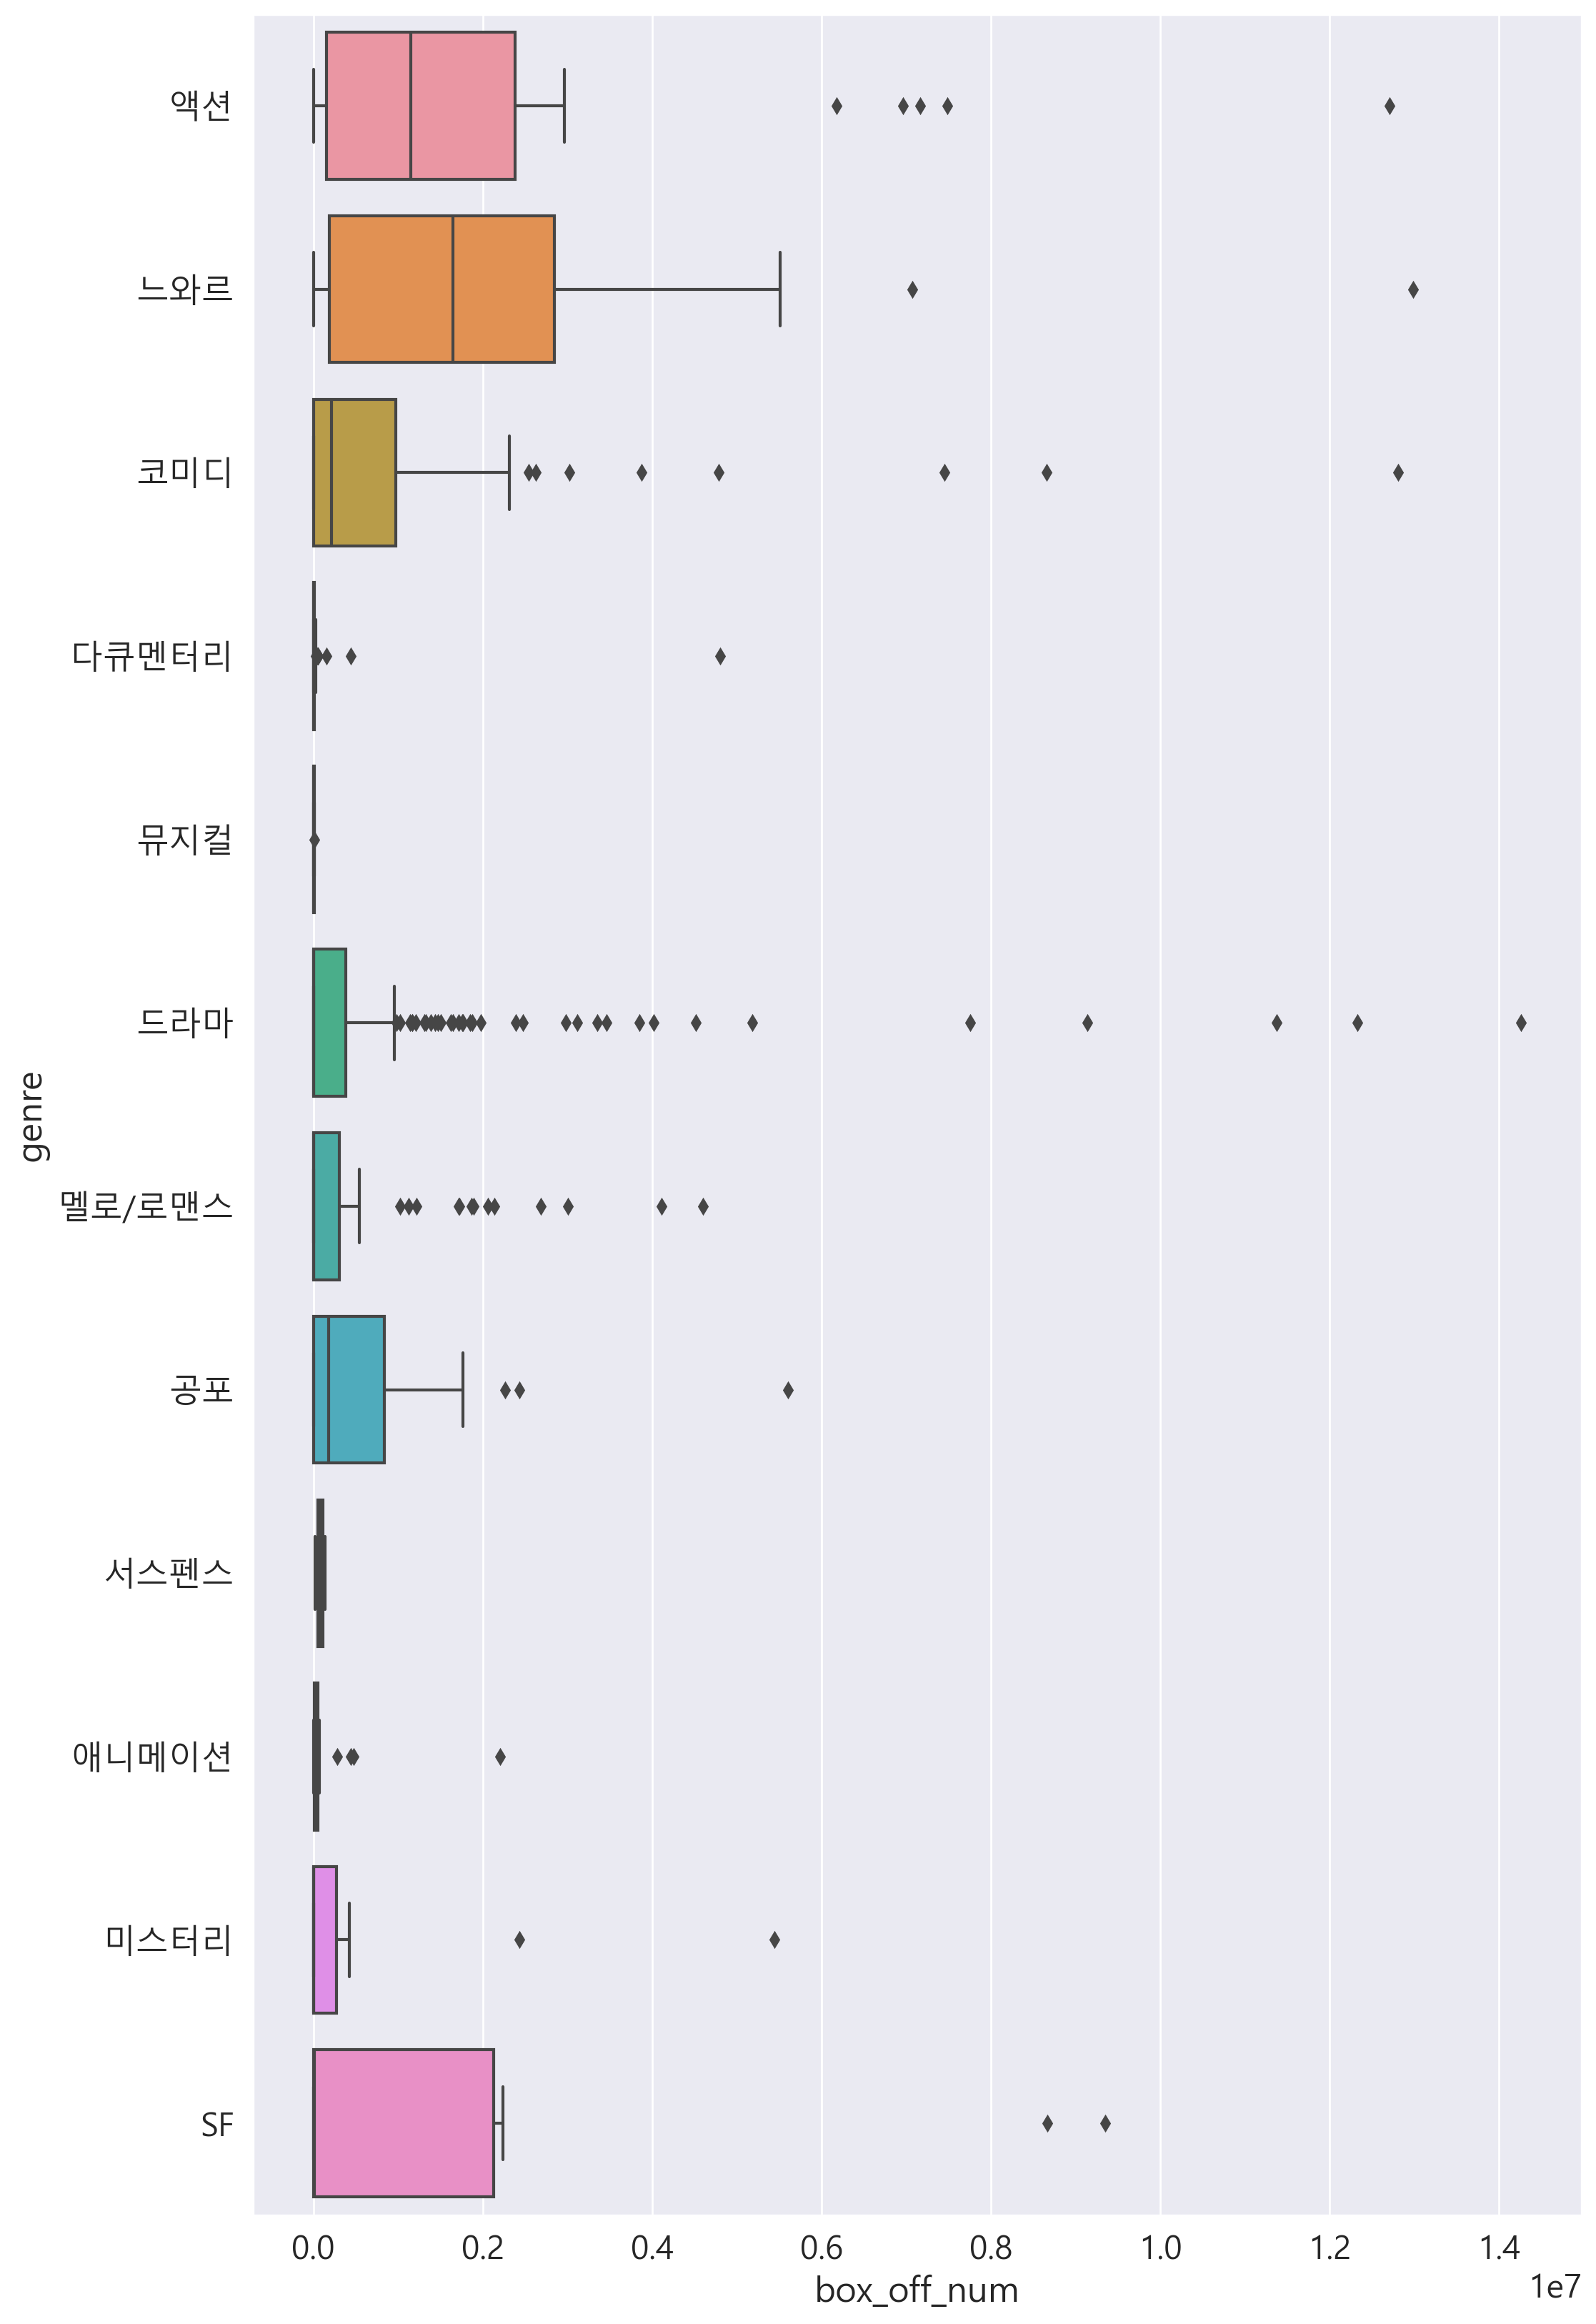

In [25]:
flg = plt.figure(figsize=(12,20))
sns.boxplot(x='box_off_num', y='genre', data=df)

In [26]:
## 다큐, 뮤지컬, 서스펜스, 애니메이션의 관객수는 상대적으로 적다.
# 느와르 장르를 많이 보는 것을 알 수 있다. 

<Axes: xlabel='dir_prev_num', ylabel='genre'>

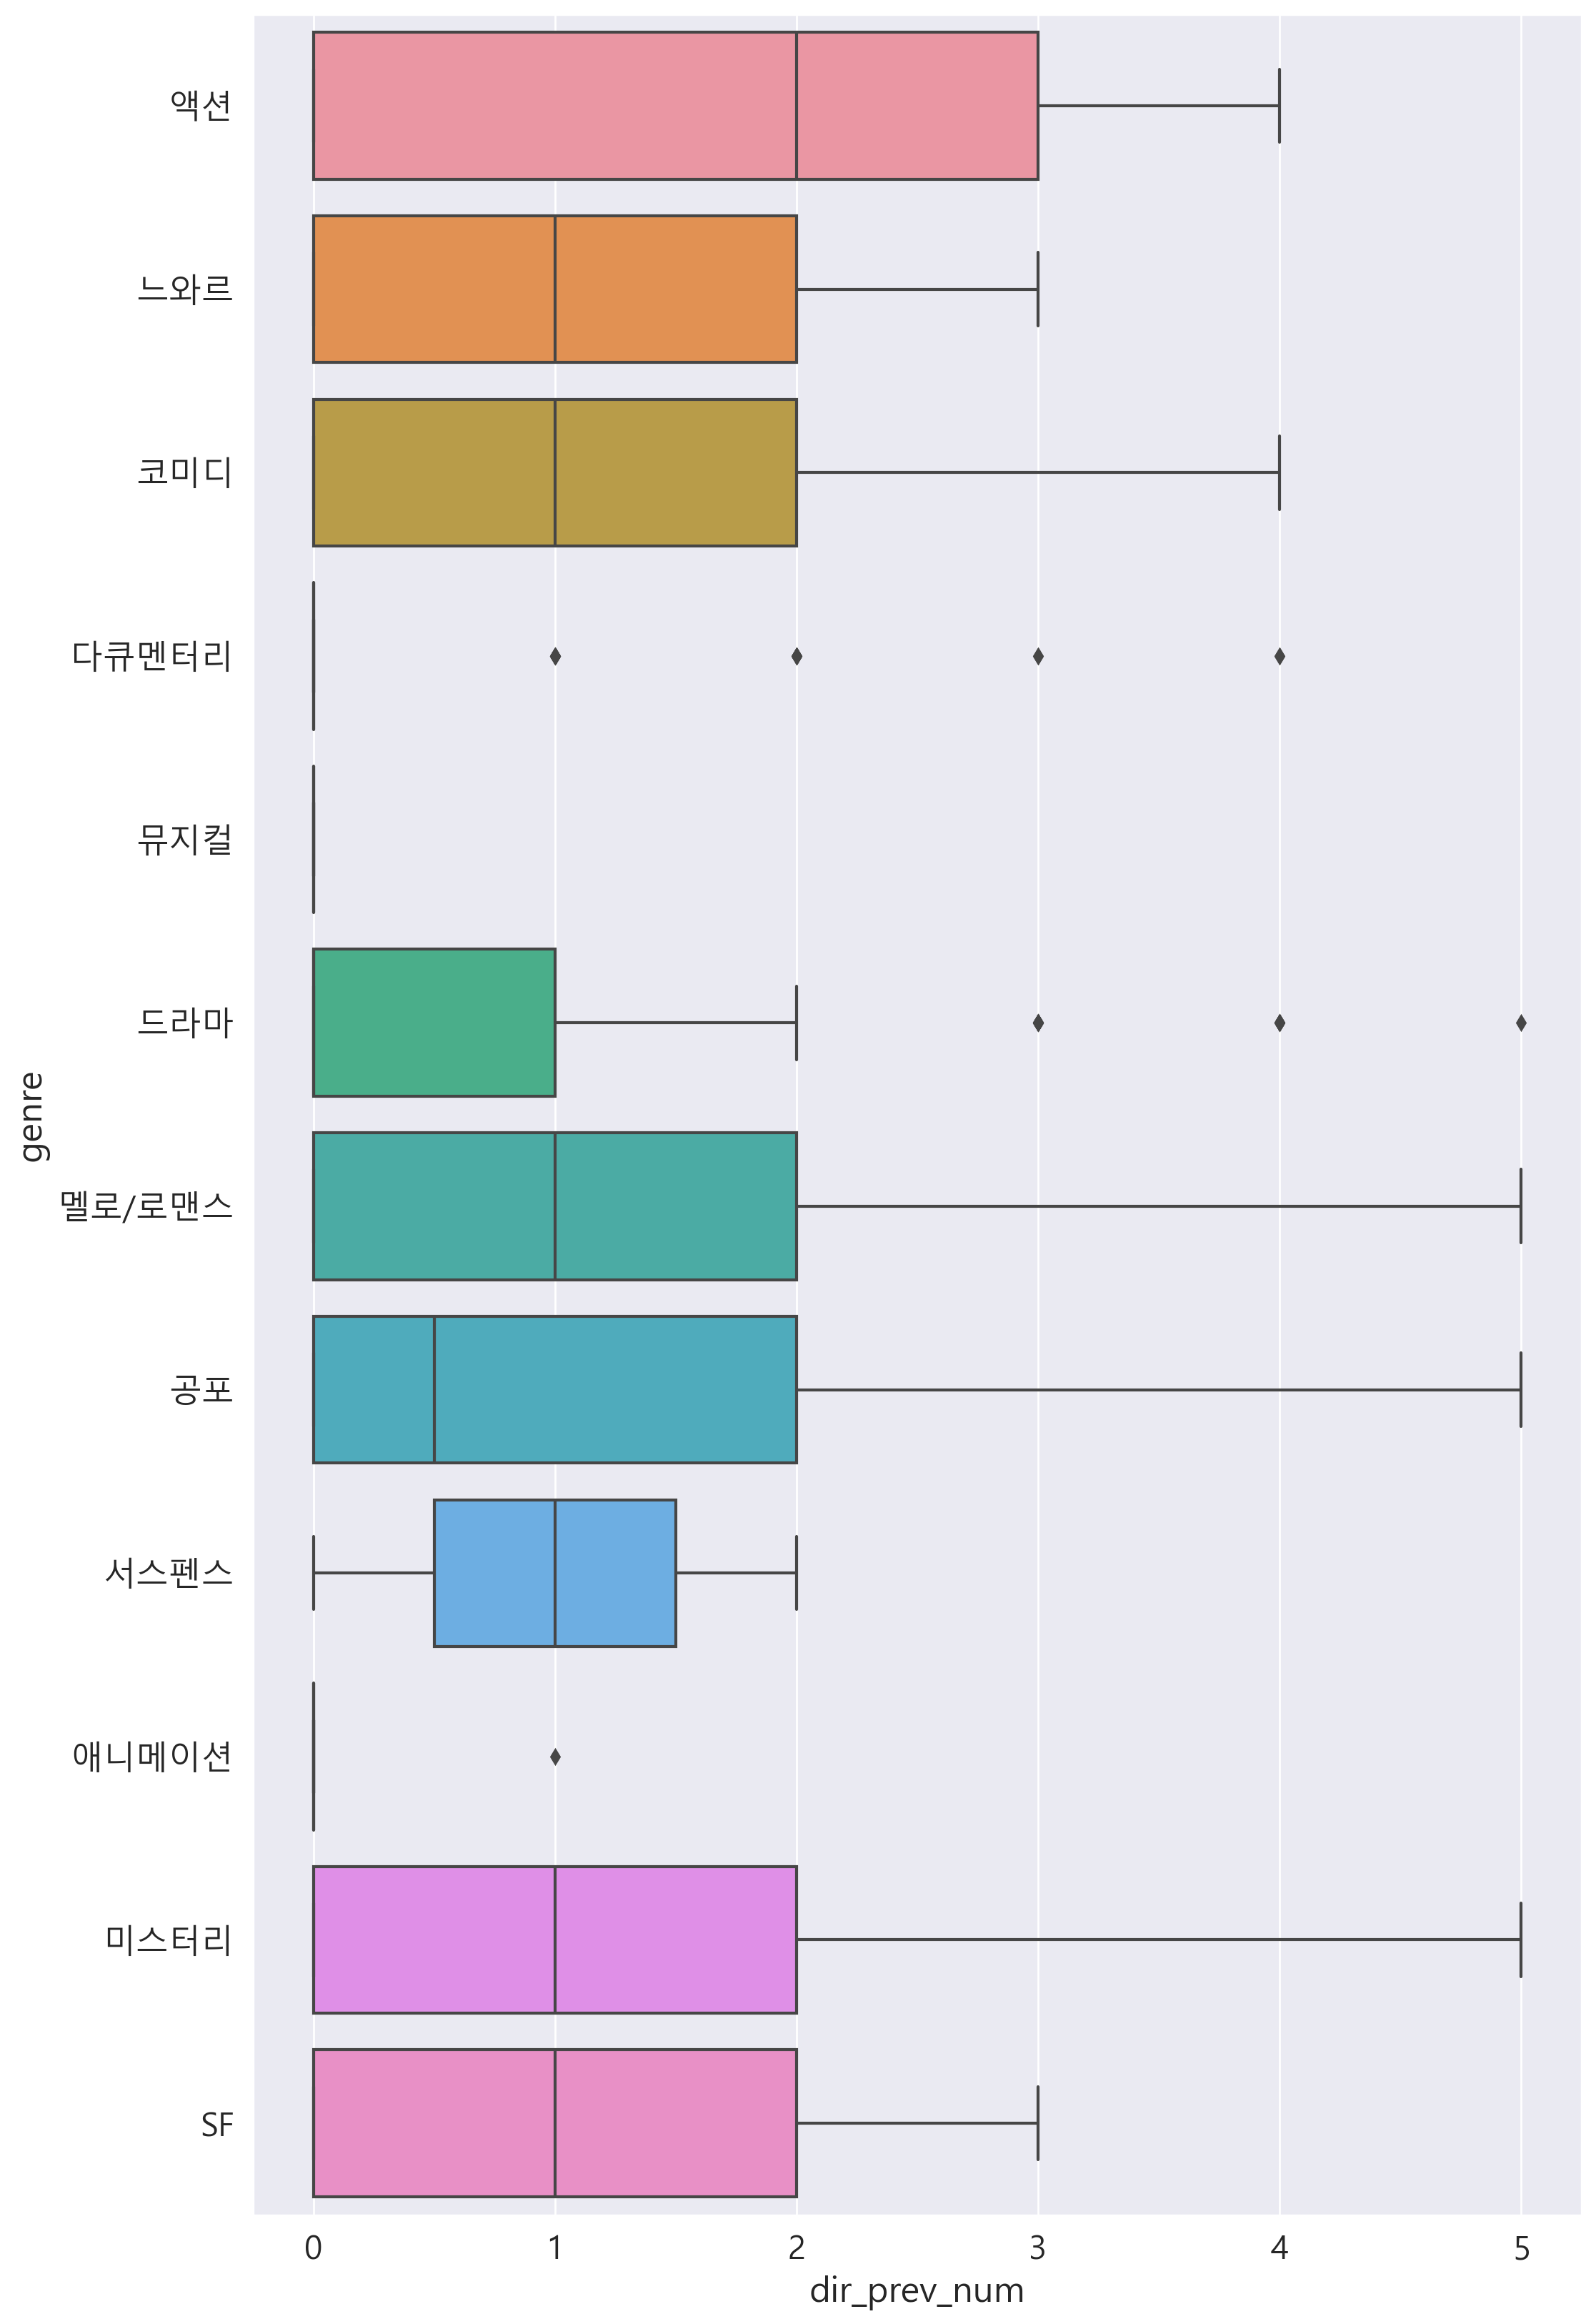

In [27]:
# 장르와 dir_prev_num의 특징을 살펴보겠다. 
fig = plt.figure(figsize=(12,20))
sns.boxplot(x='dir_prev_num', y='genre',data=df)

In [28]:
## 만드는 것에 난이도가 높은 액션, 느와르, SF는 
## 영화를 제작하기 전 제작에 참여한 갯수가 높을 것 같았는데 예상이 맞았고, 
## 다큐, 뮤지컬, 애니메이션은 제작에 처음 참여한 감독이 많다. 
## 위의 그래프와 전의 그래프를 보아 새로운 신입감독이 제작을 하는 것은 관객수가 적은 것 같다.  

### 감독별 차이 탐색
- 영화를 선택할 때 감독이 누구인지도 많은 관련성이 있다고 생각하여 감독별 차이를 탐색하고자 한다. 

In [29]:
director = df['director'].unique()

In [30]:
print(len(director))
# director의 유효한 값이 너무 많아서 누적관객수 상위 20명의 감독만 보려고 한다. 

472


In [31]:
director = df[['director', 'title', 'box_off_num']].sort_values(by='box_off_num')

In [32]:
director_top20 = director.groupby('director').sum()['box_off_num'].sort_values(ascending=False).head(20)
director_top20 = director_top20.reset_index()
director_top20

,director,box_off_num
0,최동훈,25690504
1,이석훈,16425919
2,윤제균,14262766
3,추창민,13973002
4,이환경,13347092
5,우민호,11480550
6,강형철,11469079
7,양우석,11374879
8,류승완,9889560
9,봉준호,9350351


<Axes: xlabel='box_off_num', ylabel='director'>

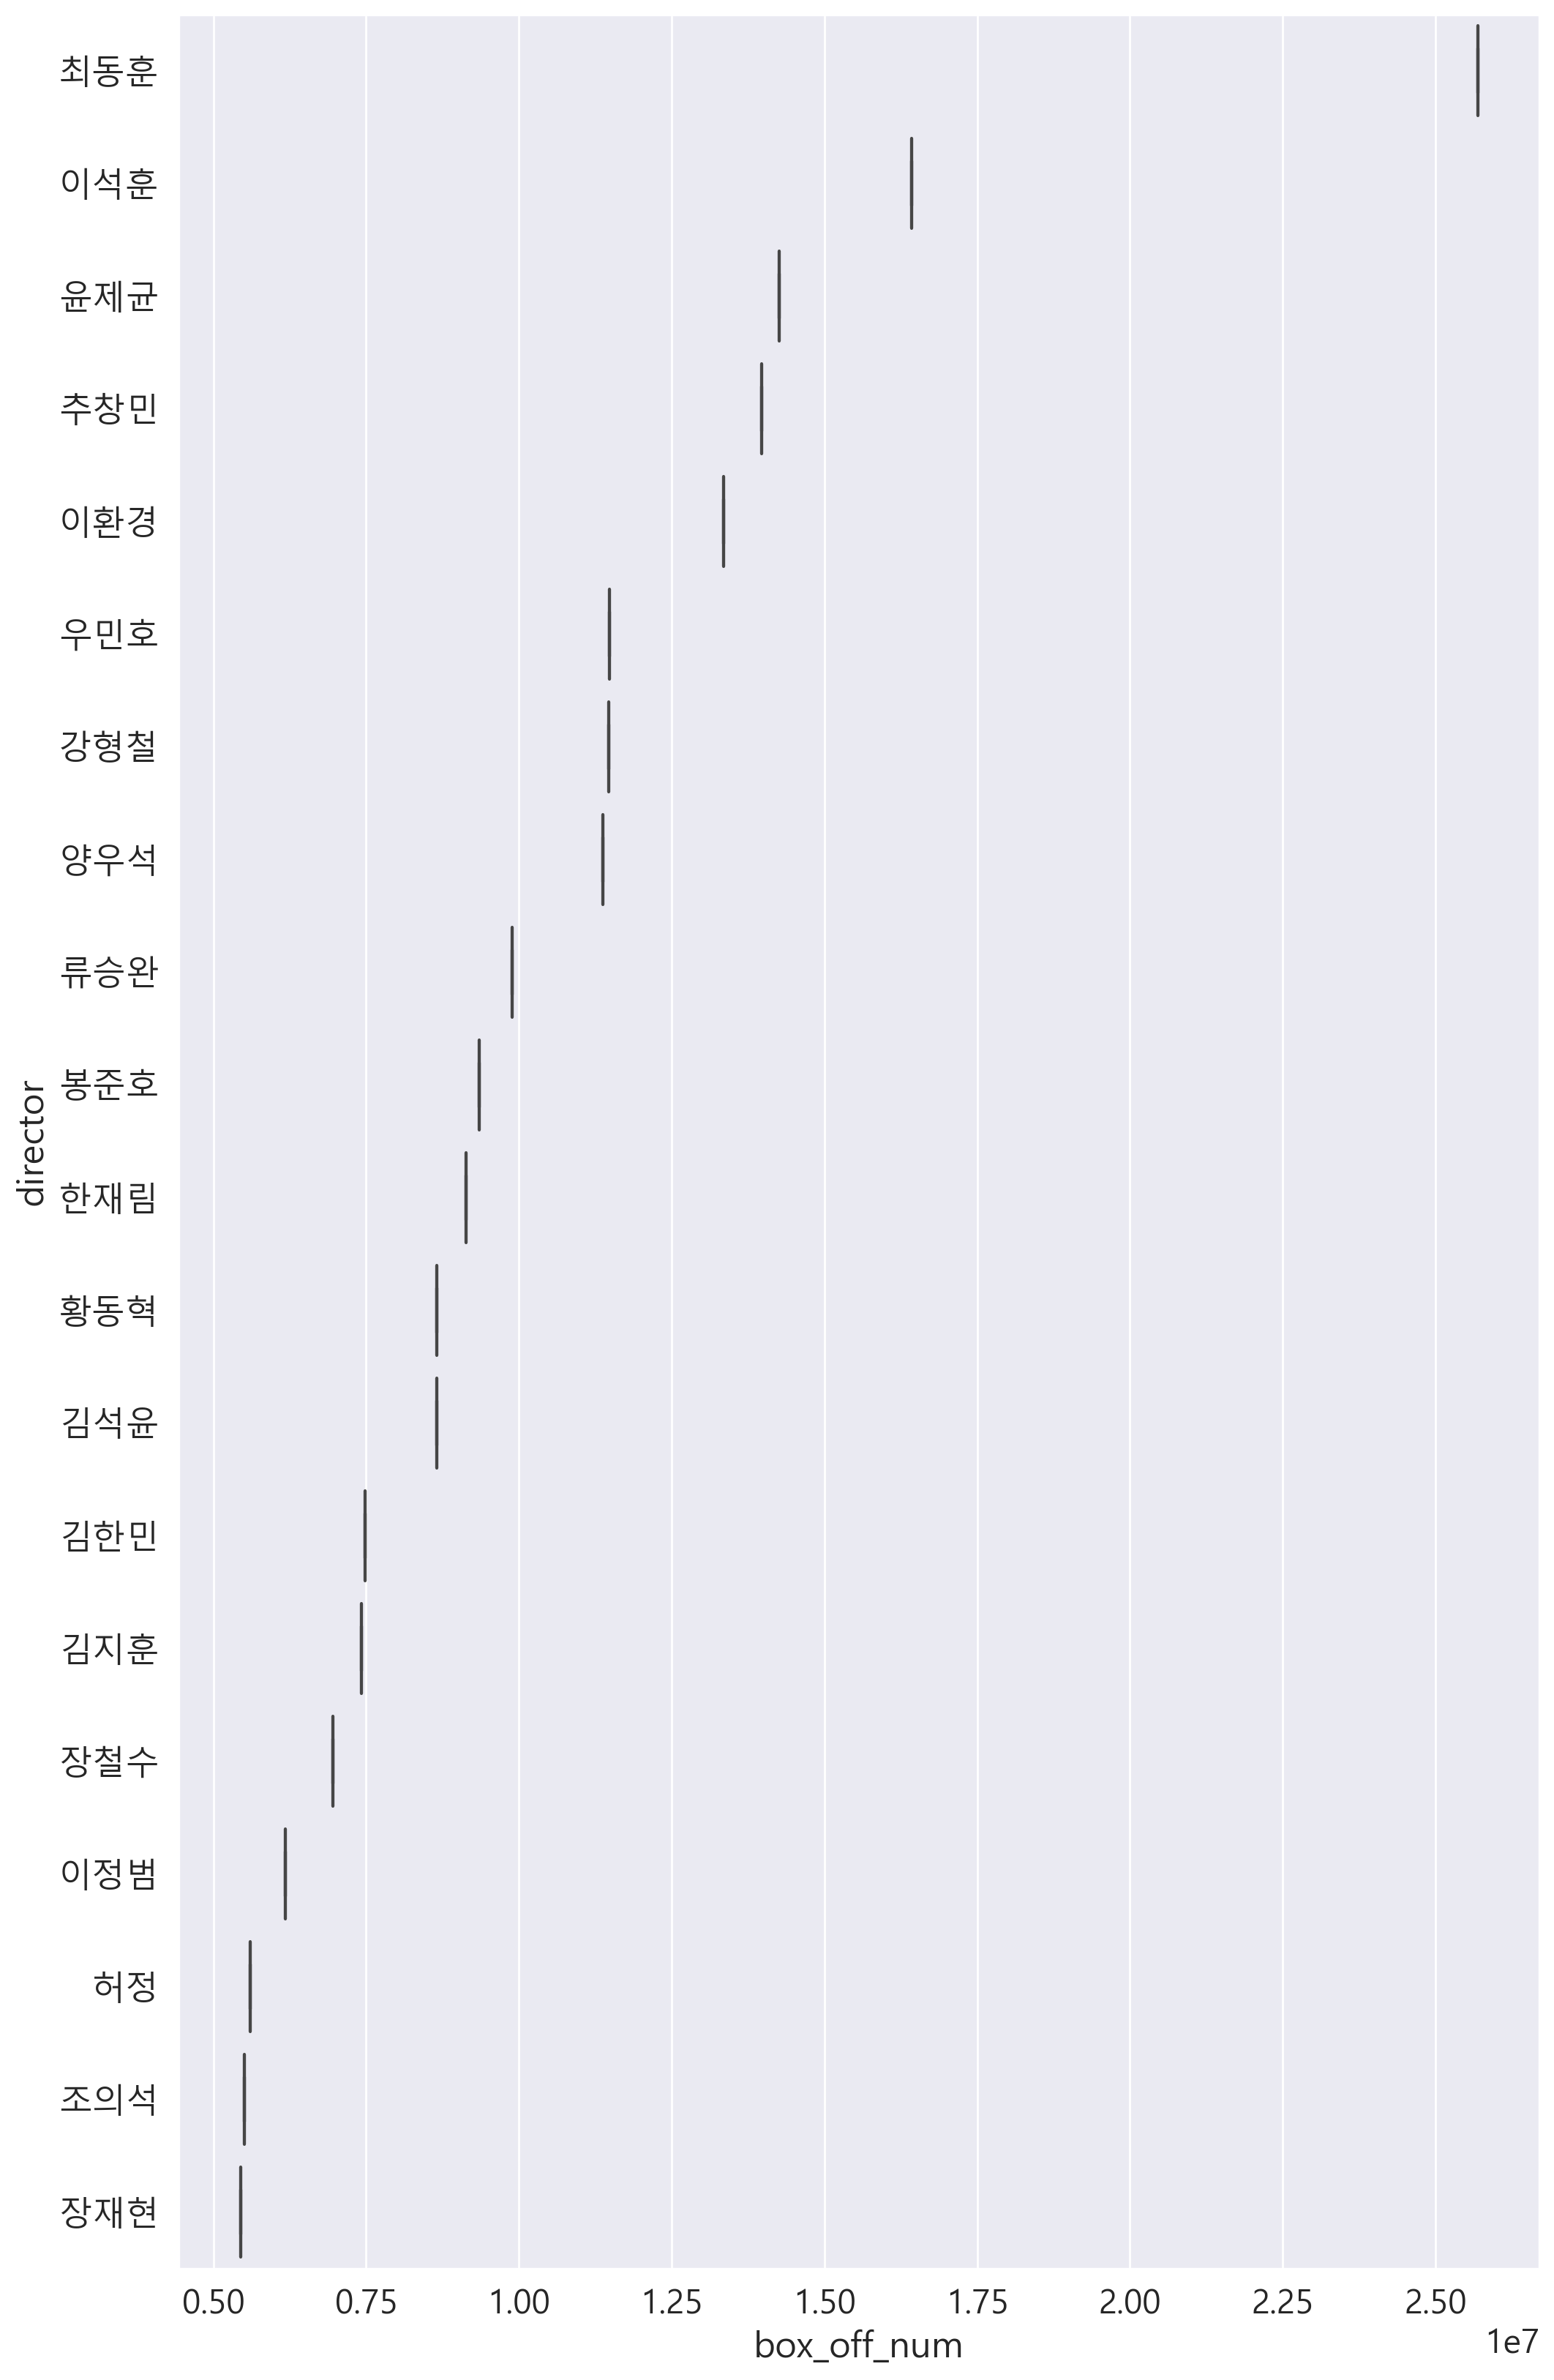

In [33]:
fig = plt.figure(figsize=(12,20))
sns.boxplot(x='box_off_num', y='director', data=director_top20)

In [34]:
director_top20_movie = df.loc[df['director'].isin(director_top20['director']),:]
director_top20_movie['title'] = director_top20_movie['title'] + '(' + director_top20_movie['director'] + ')'
director_top20_movie.head()

C:\Users\ahneunjeong\AppData\Local\Temp\ipykernel_16440\3135660612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  director_top20_movie['title'] = director_top20_movie['title'] + '(' + director_top20_movie['director'] + ')'


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
1,내부자들(우민호),(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501,2015,11
2,은밀하게 위대하게(장철수),(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083,2013,6
16,써니(강형철),CJ E&M Pictures,코미디,2011-05-04,124,15세 관람가,강형철,8223342.00000,1,572,11,7453715,2011,5
44,부당거래(류승완),CJ 엔터테인먼트,느와르,2010-10-28,119,청소년 관람불가,류승완,0.00000,0,471,4,2723028,2010,10
58,파괴된 사나이(우민호),시너지,공포,2010-07-01,114,청소년 관람불가,우민호,0.00000,0,290,5,1012310,2010,7


<Axes: xlabel='box_off_num', ylabel='title'>

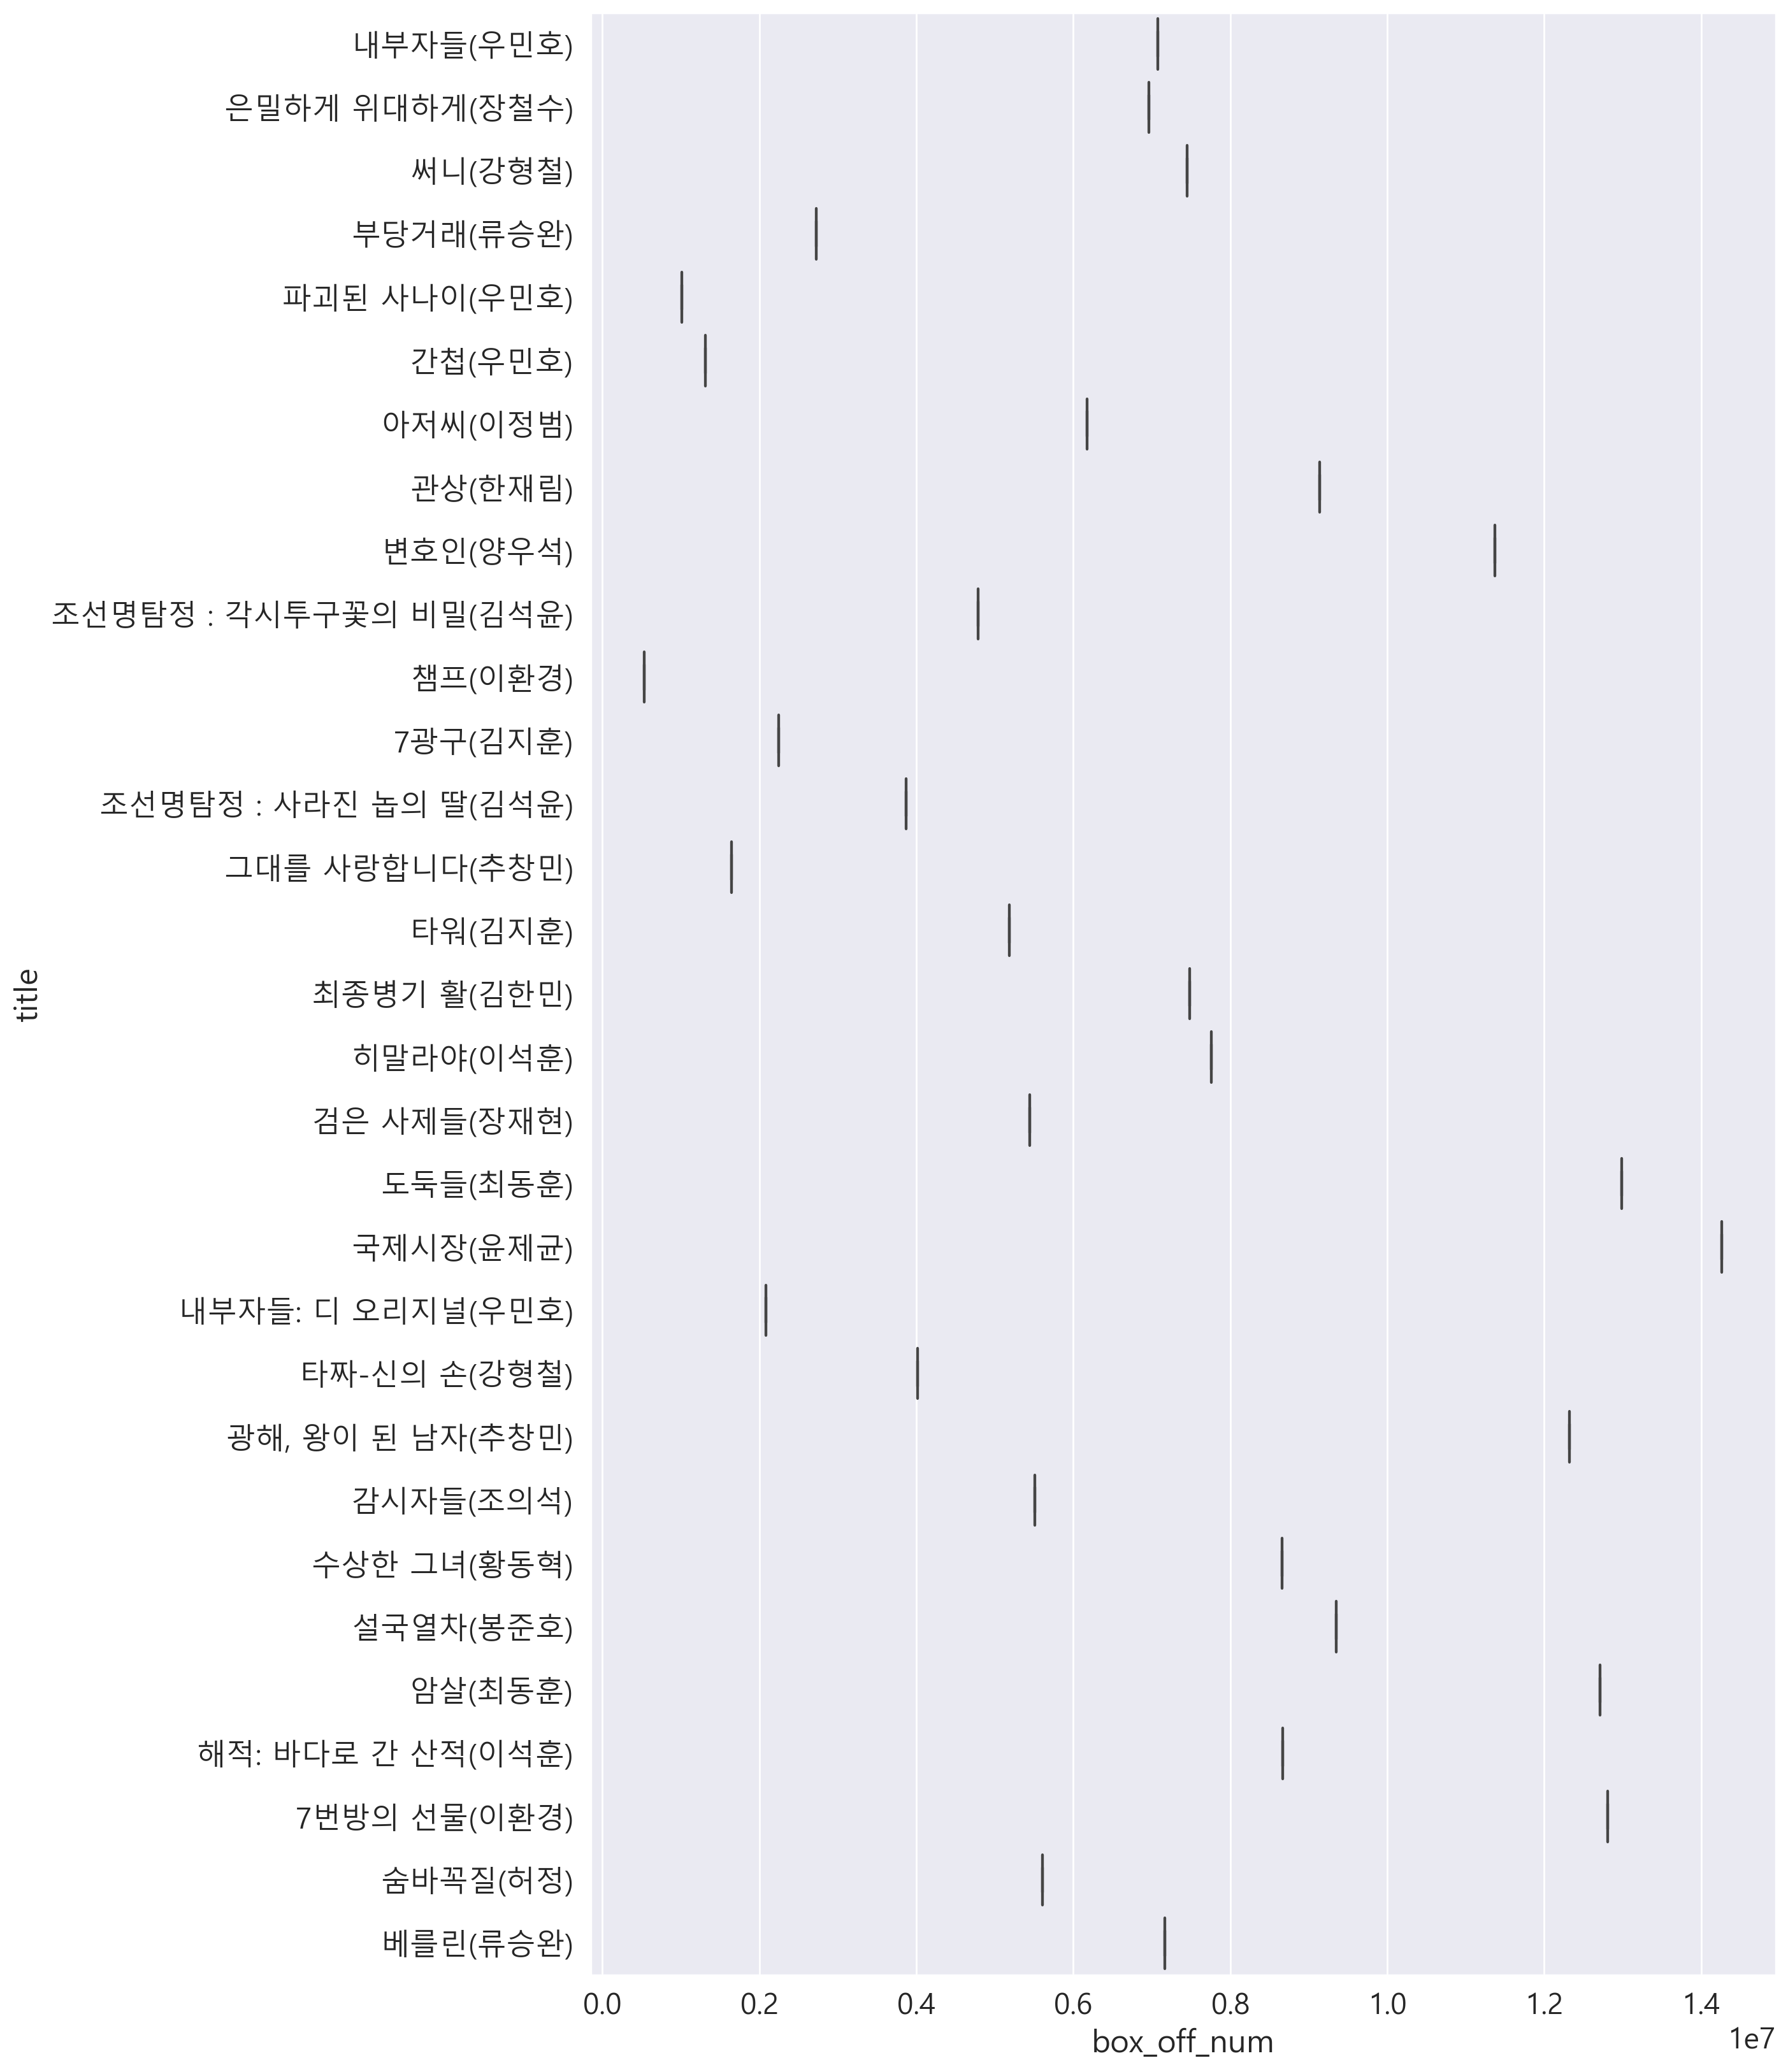

In [35]:
fig = plt.figure(figsize=(12,20))
sns.boxplot(x='box_off_num', y='title', data=director_top20_movie)

In [36]:
## 암살과 도둑들의 감독인 최동훈의 영화는 관객수가 많았다. 

In [37]:
# 관객수 상위 20% 감독들이 만든 영화는 전체적으로 관객수가 많았다. 
# 그러나 같은 감독임에도 관객수가 많은 영화, 아닌 영화가 있기에 큰 상관관계는 있다고 할 수 없다. 

## 관객수 예측 모델링

In [38]:
df.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00000,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083,2013,6


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
 12  year            600 non-null    int64         
 13  month           600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(5)
memo

### 데이터 전처리

In [40]:
df = df.drop(['director', 'title', 'distributor', 'release_time', 'screening_rat','genre'],axis=1)

In [41]:
df.head(3)

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,96,0.00000,0,91,2,23398,2012,11
1,130,1161602.50000,2,387,3,7072501,2015,11
2,123,220775.25000,4,343,4,6959083,2013,6


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            600 non-null    int64  
 1   dir_prev_bfnum  600 non-null    float64
 2   dir_prev_num    600 non-null    int64  
 3   num_staff       600 non-null    int64  
 4   num_actor       600 non-null    int64  
 5   box_off_num     600 non-null    int64  
 6   year            600 non-null    int64  
 7   month           600 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 37.6 KB


#### 표준화
- Feature들의 scale 차이를 없애기 위해 표준화를 진행한다
- 더미변수인 genre는 제외한다.  

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_columns = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor', 'year', 'month']
df[scale_columns] = scaler.fit_transform(df[scale_columns])

In [45]:
df[scale_columns].head(3)

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,year,month
0,-0.26895,-0.36129,-0.74142,-0.36322,-0.69807,-0.43362,1.17585
1,1.61132,0.52653,0.95003,1.42512,-0.28904,1.30472,1.17585
2,1.22421,-0.19255,2.64147,1.15929,0.11998,0.14583,-0.29826


#### training/test set나누기

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop('box_off_num', axis=1)
y = df['box_off_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [47]:
X_train.shape, y_train.shape

((480, 7), (480,))

In [48]:
X_test.shape, y_test.shape

((120, 7), (120,))

#### 다중공사성 판단

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif.round(1)

,features,VIF Factor
0,time,1.60000
1,dir_prev_bfnum,1.20000
2,dir_prev_num,1.40000
3,num_staff,1.90000
4,num_actor,1.00000
5,year,1.00000
6,month,1.00000


In [79]:
## vif값을 확인해보면 모든 변수의 vif값이 다 10이하이다. 따라서 모든 feature를 활용하여 회귀 모델링을 진행하겠다.

### 회귀 모델링

In [50]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

pred_test = lr.predict(X_test)

In [52]:
coefs = pd.DataFrame(zip(df.columns, lr.coef_), columns = ['feature','coefficients'])
coefs

,feature,coefficients
0,time,294386.70918
1,dir_prev_bfnum,187161.46449
2,dir_prev_num,-59519.03603
3,num_staff,919801.49741
4,num_actor,40113.36571
5,box_off_num,51868.55663
6,year,26873.03154


In [53]:
## 값순으로 재정렬
coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
3,num_staff,919801.49741
0,time,294386.70918
1,dir_prev_bfnum,187161.46449
2,dir_prev_num,-59519.03603
5,box_off_num,51868.55663
4,num_actor,40113.36571
6,year,26873.03154


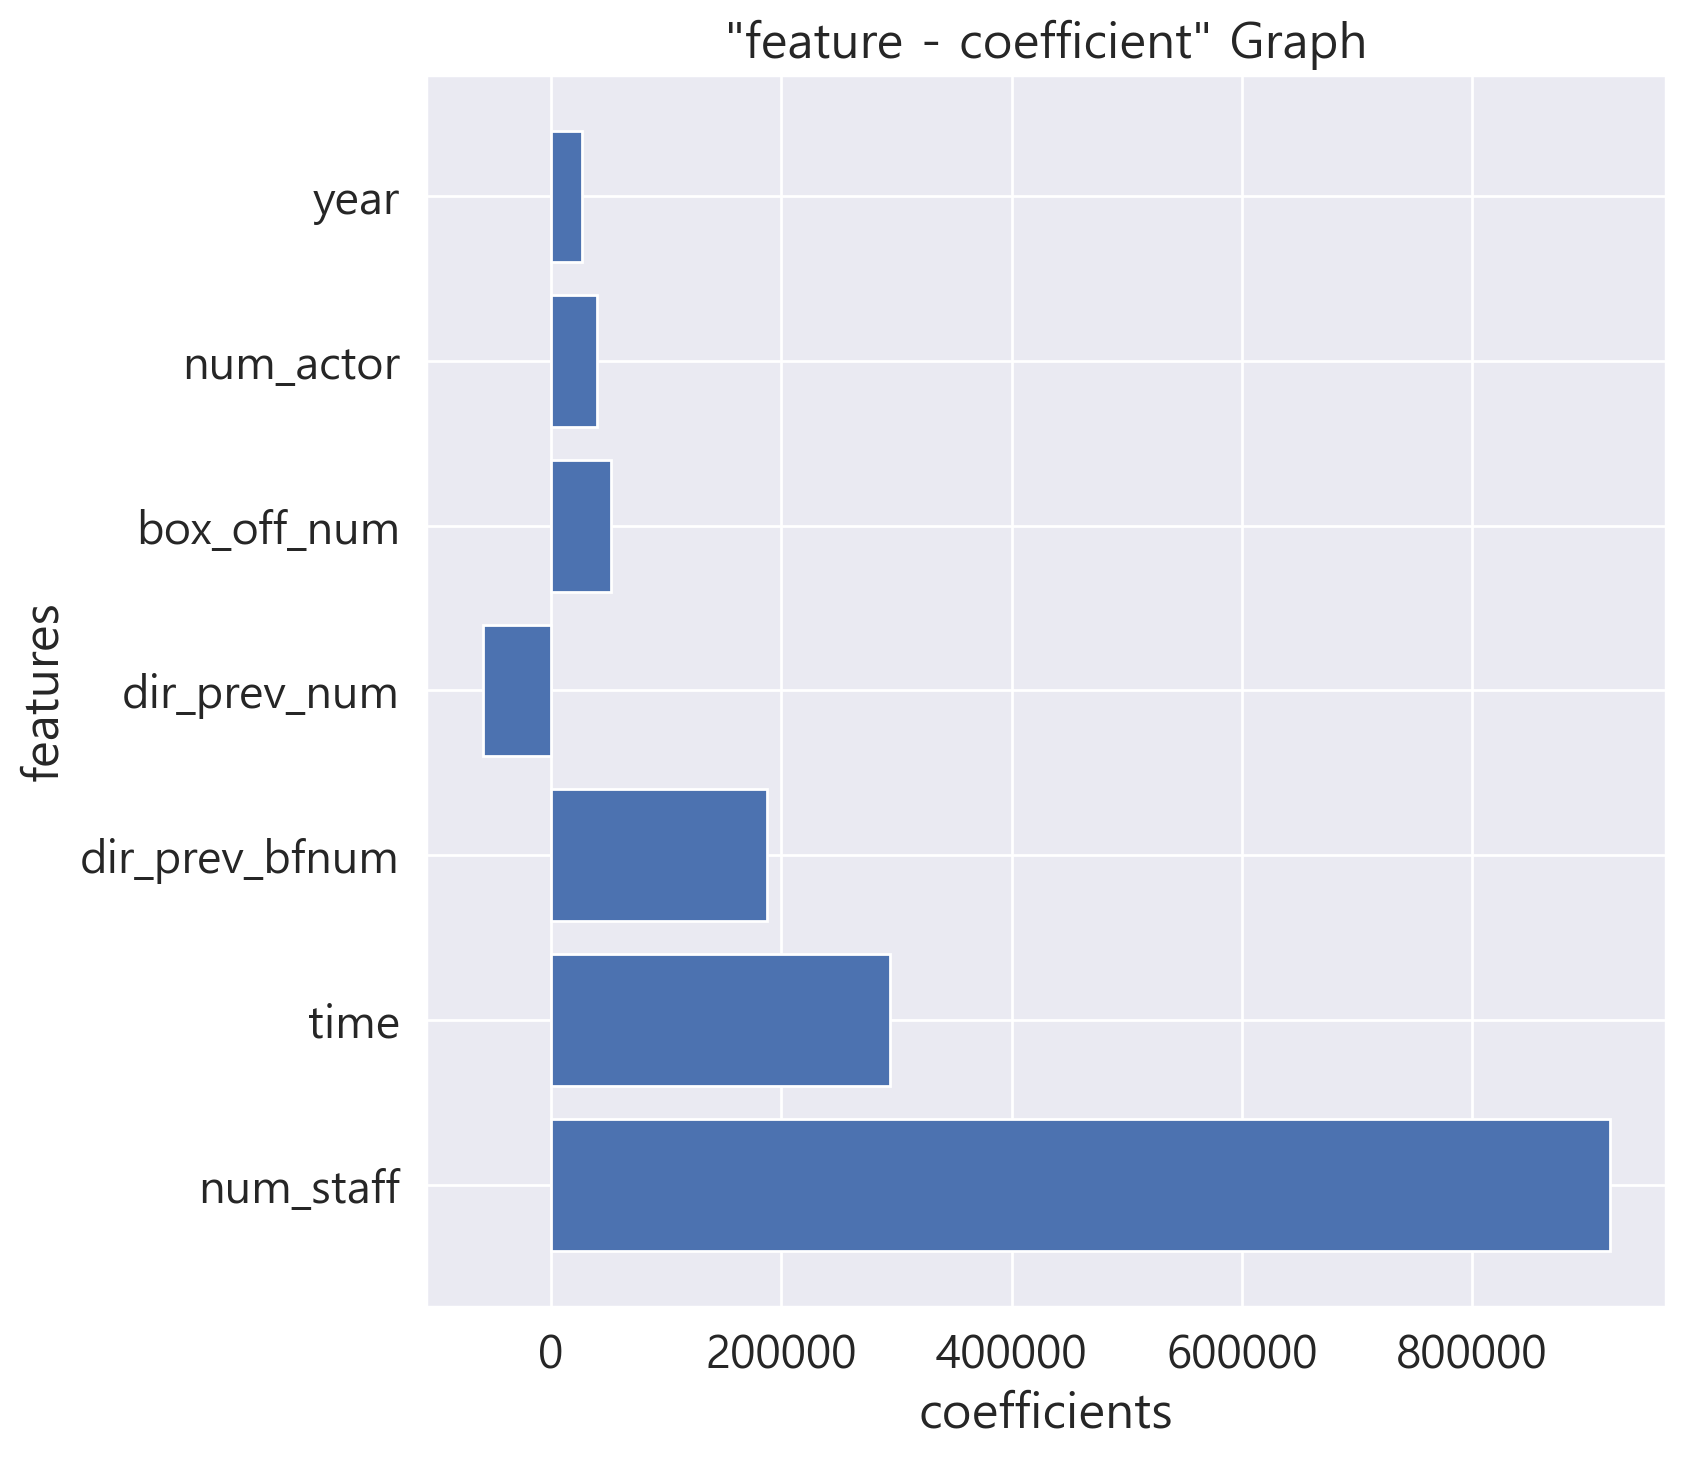

In [54]:
### coefficients 를 시각화 합니다. 

### figure size
plt.figure(figsize = (8, 8))

plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

### 모델해설

#### 유의성 검정

In [55]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            box_off_num   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     37.98
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           3.40e-42
Time:                        13:27:42   Log-Likelihood:                -7529.2
No. Observations:                 480   AIC:                         1.507e+04
Df Residuals:                     472   BIC:                         1.511e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7.764e+05   7.24e+04     10.730      0.000    6.34e+05    9.19e+05
time            2.944e+05   9.35e+04      3.147      0.002    1.11e+05    4.78e+05
dir_prev_bfnum  1.872e+05   7.64e+04      2.448      0.015    3.69e+04    3.37e+05
dir_prev_num   -5.952e+04   8.55e+04     -0.696      0.487   -2.28e+05    1.09e+05
num_staff       9.198e+05   1.01e+05      9.091      0.000    7.21e+05    1.12e+06
num_actor       4.011e+04   6.88e+04      0.583      0.560    -9.5e+04    1.75e+05
year            5.187e+04   7.29e+04      0.712      0.477   -9.13e+04    1.95e+05
month           2.687e+04   7.36e+04      0.365      0.715   -1.18e+05    1.71e+05
==============================================================================
Omnibus:                      373.345   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6359.287
Skew:                           3.295   Prob(JB):                         0.00
Kurtosis:                      19.569   Cond. No.                         2.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 해설
우선 결정계수가 38%밖에 나오지 않아, 이 모델은 유용성이 낮다..
1. dir_prev_num, num_actor, year, month, SF, 공포, 드라마, 멜로/로맨스, 뮤지컬, 미스터리, 서스펜스, 애니메이션, 액션, 코미디는 유의하지 않다. 
2. positive변수 설명
    - time
    - dir_prev_bfnum
    - num_staff
    - 느와르

#### 모델의 시각화

In [56]:
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

,actual,prediction
0,112,-357705.68113
1,158,-294432.49964
2,201,-209006.74512
3,205,72671.33178
4,279,375359.76206


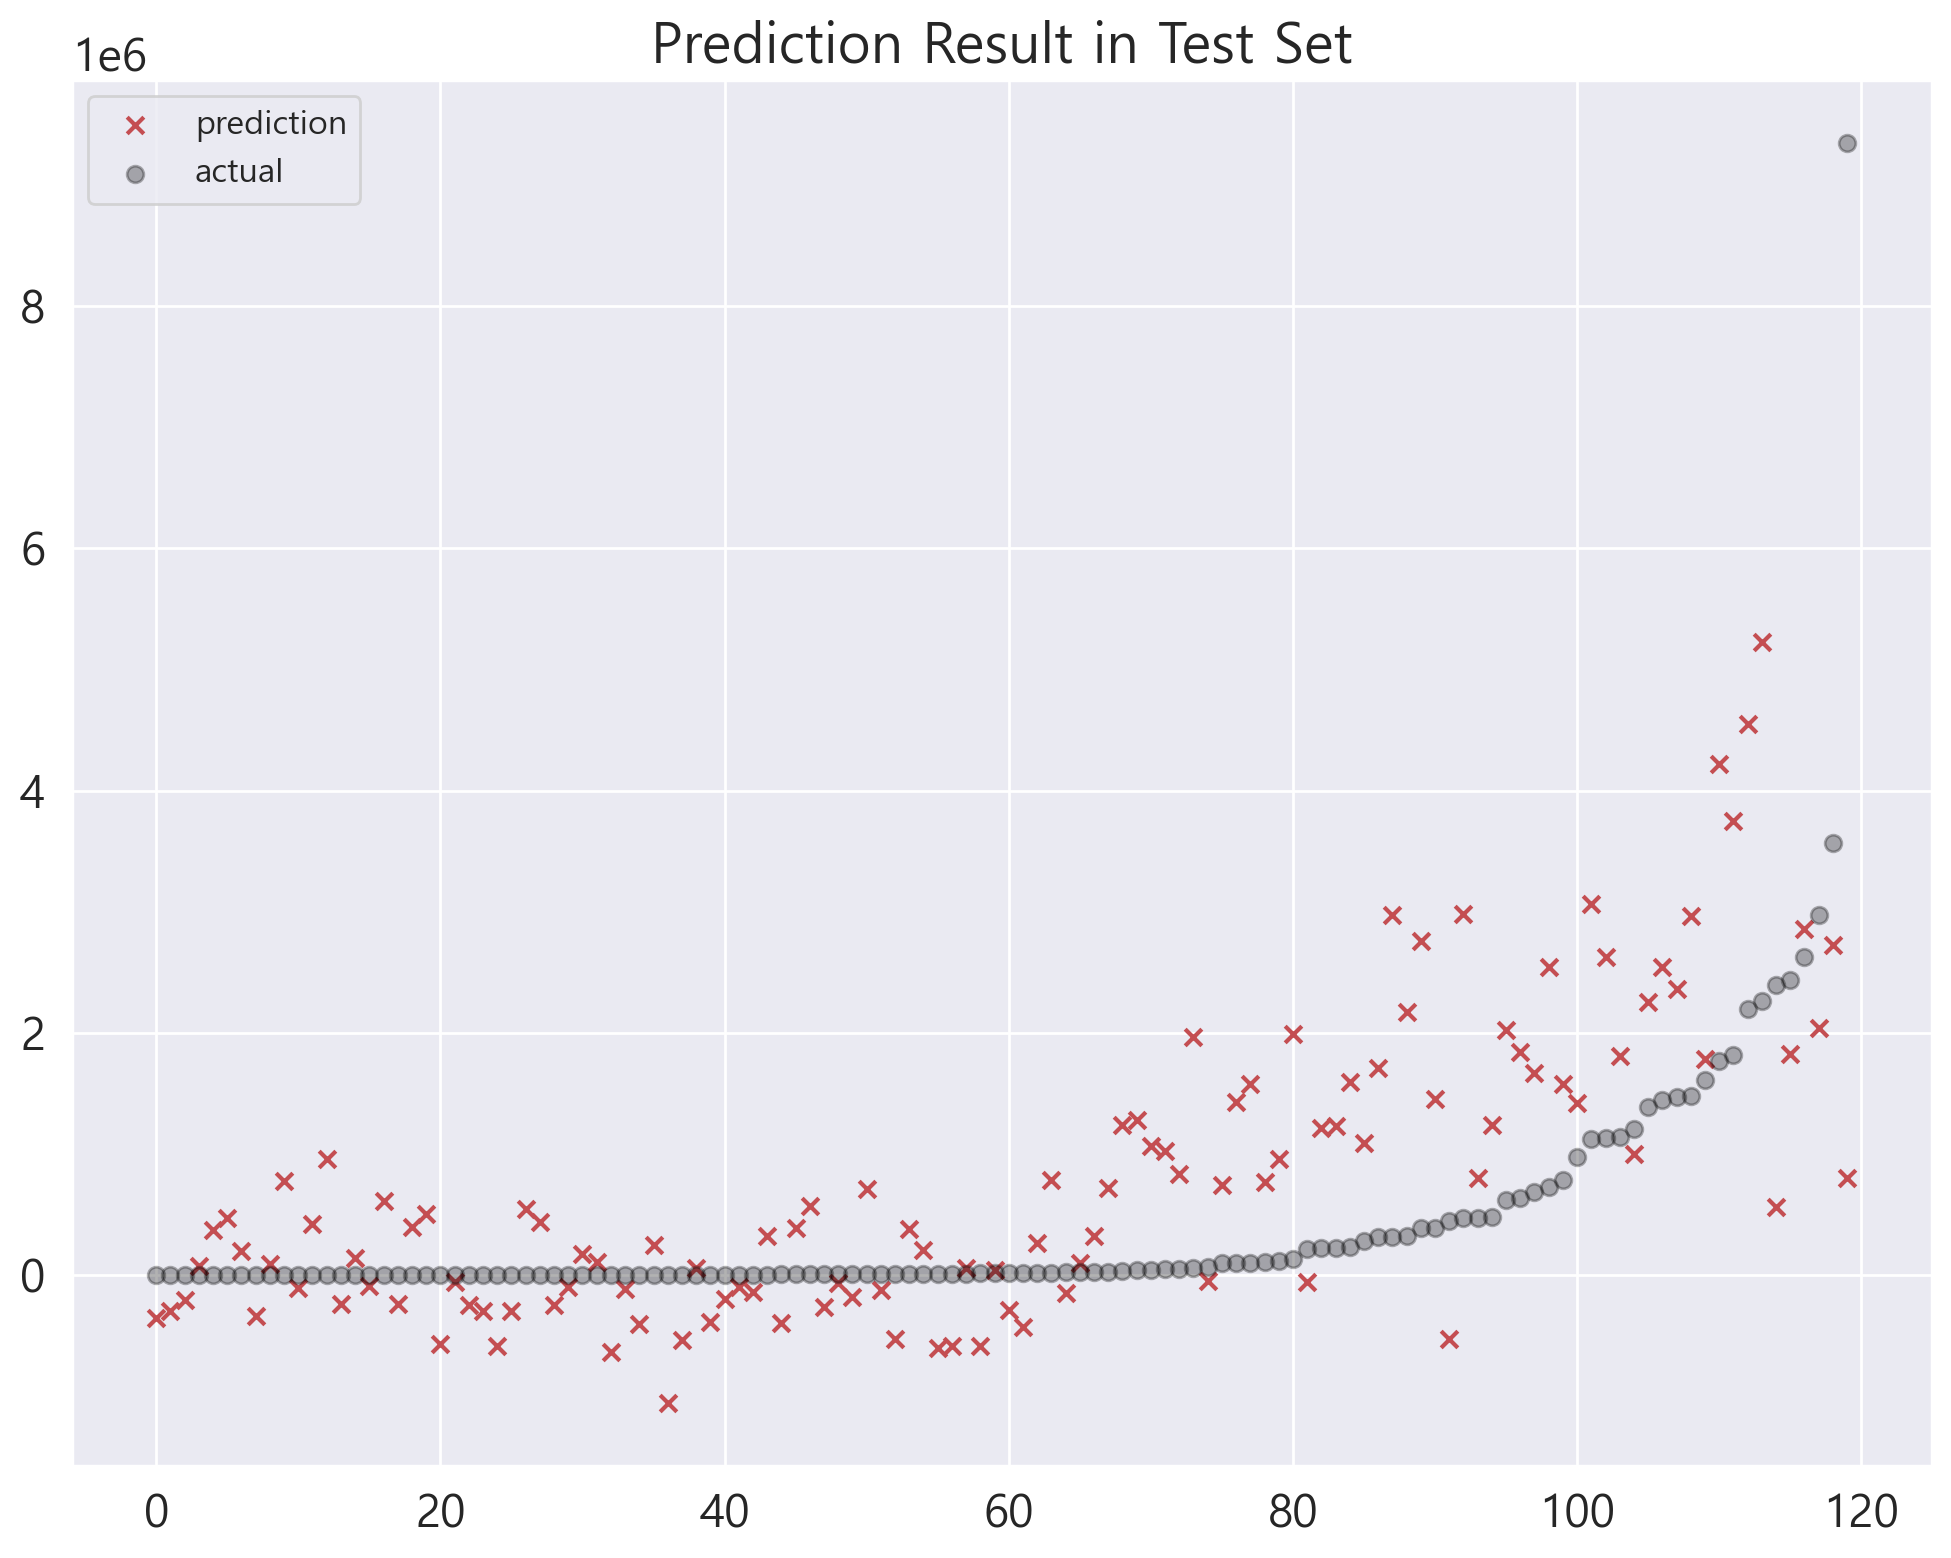

In [57]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

In [58]:
print(model.score(X_train, y_train)) 
print(model.score(X_test, y_test))

0.360286919382552
-0.3054055313828108


In [59]:
# RMSE
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train))) 
# train error 구함

# test set
print(sqrt(mean_squared_error(y_test, pred_test)))
# test error 구함

1570408.7009851367
1238875.9022551097


In [95]:
### 해설) Test Set에서 해당 예측모델의 R- square가 -0.4이고, RMSE가 1,300,000이 나왔다..
# 이 모델은 성능이 좋지 않다. 
# 선형회귀 모델이 아닌 랜덤포레스트 같은 다른 모델을 적용해보는 것이 좋을 것 같다.